# Unit 4.18c: Jacobi method for 2d Poisson's problem

---

###  Jacobi Method

$$\frac{d^{2}u}{dx^{2}}+\frac{d^{2}u}{dy^{2}}=-f$$


$$\frac{u_{i+1,j}+u_{i-1,j}+u_{i,j+1}+u_{i,j-1}-4u_{i,j}}{h^{2}}=-f_{i,j}$$


$$\Rightarrow u_{i,j}=\frac{1}{4}\left(u_{i+1,j}+u_{i-1,j}+u_{i,j+1}+u_{i,j-1}+h^{2}f_{i,j}\right)$$


Iteration 
$$\Rightarrow u_{i,j}^{n+1}=\frac{1}{4}\left(u_{i+1,j}^{n}+u_{i-1,j}^{n}+u_{i,j+1}^{n}+u_{i,j-1}^{n}+h^{2}f_{i,j}\right)$$


The error at grid point $\left(i,j\right)$ is 

$$\Delta=\big|\frac{u_{i+1,j}+u_{i-1,j}+u_{i,j+1}+u_{i,j-1}-4u_{i,j}}{h^{2}}+f_{i,j}\big|$$


---

```python
# Jacobi's Method
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
nx = 50 # total 50 intervals
ny = 50 # total 50 intervals
L = 2. # meters
h = L/(nx)
#x = np.arange(nx+1) * h - 1.
#y = np.arange(ny+1) * h - 1.
#X, Y = np.meshgrid(x,y)
x = np.linspace(-1,1,nx+1)
y = np.linspace(-1,1,ny+1)
X, Y = np.meshgrid(x,y)

#===
def AssignSource_f(nx,ny,h):
    f_arr = np.zeros([nx+1, ny+1])
    for i in range(nx+1): 
        for j in range(ny+1):
            pos_x = 
            pos_y = 
            if (....):
                f_arr[i,j] = 1.
    return f_arr

    
#===
u_old = np.ones([nx+1, ny+1])
u_new = np.zeros([nx+1 , ny+1])
f_arr = AssignSource_f(nx,ny,h)
Iter_Max = 5000
for iter in range(Iter_Max):
    res = 0.
    for i in range(1,nx): # except boundary
        for j in range(1,ny): # except boundary 
            f_val = 
            delta = 
            u_new[i,j] = 
            res = max(res,abs(delta))            
    u_old[:] = u_new[:]
    if iter%1000 == 0:
        print ("iter = {}, res = {:5.2e}".format(iter, res))      

  
```







In [21]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
nx = 50 # total 50 intervals
ny = 50 # total 50 intervals
L = 2. # meters
h = L/(nx)
x = np.linspace(-1,1,nx+1)
y = np.linspace(-1,1,ny+1)
X, Y = np.meshgrid(x,y)

#===
def AssignSource_f(nx,ny,h):
    f_arr = np.zeros([nx+1, ny+1])
    for i in range(nx+1): 
        for j in range(ny+1):
            pos_x = i * h - 1
            pos_y = j * h - 1
            
            cond_1 = pos_x >= -0.5
            cond_2 = pos_x <= 0.5
            cond_3 = pos_y >= -0.5
            cond_4 = pos_y <= 0.5
            if (cond_1 == True and cond_2 == True and cond_3 == True and cond_4 == True):
                f_arr[i,j] = 1.
    return f_arr

#===
u_old = np.zeros([nx+1, ny+1])
u_new = np.zeros([nx+1 , ny+1])
f_arr = AssignSource_f(nx,ny,h)
Iter_Max = 5000
#===

for iter in range(Iter_Max):
    res = 0.
    for i in range(1,nx): # except boundary
        for j in range(1,ny): # except boundary 
            f_val = f_arr[i,j]
            
            u_right = u_old[i+1,j]
            u_left = u_old[i-1,j]
            u_top = u_old[i,j+1]
            u_bottom = u_old[i,j-1]
            u_val = u_old[i,j]
            temp = (u_right + u_left + u_top + u_bottom - 4. * u_val)/h**2. + f_val
            delta = abs(temp)
            u_new[i,j] = (u_right + u_left + u_top + u_bottom + h**2 * f_val)/4.0
            res = max(res,abs(delta))            
    u_old[:] = u_new[:]
    if iter%1000 == 0:
        print ("iter = {}, res = {:5.2e}".format(iter, res))      

      
        

iter = 0, res = 1.00e+00
iter = 1000, res = 1.13e-01
iter = 2000, res = 1.56e-02
iter = 3000, res = 2.17e-03
iter = 4000, res = 3.01e-04


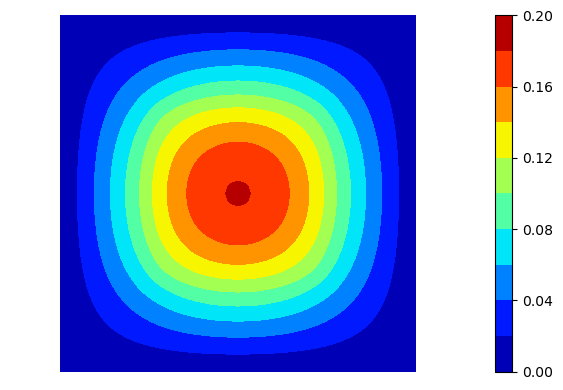

In [22]:
#===Plotting(2d)===
fig = plt.figure( dpi = 100 ) # dots per inch
fig.set_size_inches(6,4)
clb = plt.contourf(X,Y, u_new, 10, cmap = 'jet')



#plt.colorbar()
plt.colorbar()
plt.clim(0,0.2)
plt.ylabel('y')
plt.xlabel('x')
plt.axis('equal')
plt.axis('off')
plt.tight_layout()
        
    
    

In [23]:

#Gauss–Seidel Method
import numpy as np
import matplotlib.pyplot as plt

nx = 50 # total 50 intervals
ny = 50 # total 50 intervals
L = 2. # meters
h = L/(nx)
x = np.linspace(-1,1,nx+1)
y = np.linspace(-1,1,ny+1)
X, Y = np.meshgrid(x,y)
RED = 0 # even gridpoints
BLACK = 1 # odd gridpoints


#===
def AssignSource_f(nx,ny,h):
    f_arr = np.zeros([nx+1, ny+1])
    for i in range(nx+1): 
        for j in range(ny+1):
            pos_x = i * h - 1. # x position
            pos_y = j * h - 1. # y position
            if ((pos_x - 0.5)*(pos_x + 0.5)<=0) and ((pos_y - 0.5)*(pos_y + 0.5)<=0):
                f_arr[i,j] = 1.
    return f_arr




#===
u_arr = np.zeros([nx+1,ny+1])
f_arr = AssignSource_f(nx,ny,h)
Iter_Max = 1000
for iter in range(Iter_Max):
    res = 0.
    for i in range(1,nx):
        for j in range(1,ny):
            if ((i+j)%2 == BLACK):
                f_val =
                delta = 
                u_arr[i,j] =
                res = max(res,abs(delta))            
    #=====    
    for i in range(1,nx):
        for j in range(1,ny):
            if ((i+j)%2 == RED):
                f_val = 
                delta = 
                u_arr[i,j] = 
                res = max(res,abs(delta))     
    if iter%100 == 0:
        print ("iter = {}, res = {:5.2e}".format(iter, res)) 




